# <center> APIs and JSON </center>

Today we'll learn more about collecting data from the web, and a new data structure: JSON.


## Skills Covered

* Dictionaries
* Get requests
* Parsing JSON (really just elaborate dictionaries) 

## Dictionaries

A *dictionary* in Python is an unordered collection of data values, used to store data values like a map, which unlike other Data Types that hold only single value as an element, a *dictionary* holds key:value pairs.

Like lists, dictionaries can easily be changed, can be shrunk and grown ad libitum at run time. They shrink and grow without the necessity of making copies. Dictionaries can be contained in lists and vice versa. 

But what's the difference between lists and dictionaries? Lists are ordered sets of objects, whereas dictionaries are unordered sets. But the main difference is that items in dictionaries are accessed via keys and not via their position. A dictionary is an associative array (also known as hashes). Any key of the dictionary is associated (or mapped) to a value. The values of a dictionary can be any Python data type. So dictionaries are unordered key-value-pairs.

We will use dictionaries to access APIs, and we will see them again when we learn how to count words.

In [2]:
my_dict = {'education': 'high school',
          'income': 60000}
type(my_dict)

dict

In [ ]:
my_dict

The key is before the colon, the value is after the colon. 

Find all the keys from the dictionary, and then all the values.

In [ ]:
my_dict.keys()

In [ ]:
my_dict.values()

We can access keys using the bracket syntax. We've seen this before (remember columns in Pandas?). The input is a dictionary key, the output is the key's value.

In [3]:
my_dict['education']

'high school'

In [ ]:
my_dict['income']

We can add key/value pairs using the bracket syntax and the assignment operator. Notice the order of the key/value pairs does not matter, like they do in lists and strings.

In [ ]:
my_dict['age'] = 24
my_dict

# <center> Accessing Databases via Web APIs </center>
* * * * *

This tutorial comes from my colleague [Chris Hensch](https://henchc.github.io/). Thanks Chris!

His motivating question: he thinks Duke Ellington is 'trending' as of late. We're going to test this theory via the number of articles that mention him in the NYT.

If you want to try the Twitter API or other web scraping techniques, I recommend [Brian Keegan's detailed 5-week web scraping and API tutorial](https://github.com/CU-ITSS/Web-Data-Scraping-S2019).

Here's another [Twitter API tutorial using the Python library Tweepy](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/) (you can install it via Anaconda), for those who want to explore Twitter data.

## APIs

In [81]:
# Import required libraries
import requests #requests library, enables get requests
import json #data structure, similar to dictionaries
import time #pause between pings to server
import pandas #we know this one!

## 1. Constructing API GET Request
*****

First, [y'all need to set up a New York Times developer account](https://developer.nytimes.com/accounts/create), and then get an API key. 

In the first place, we know that every call will require us to provide:

1. a base URL for the API, and
2. some authorization code or key.

So let's store those in some variables.

To get the base url, we can simply use the [documentation](https://developer.nytimes.com/). The New York Times has a lot of different APIs. If we scroll down, the second one is the [Article Search API](https://developer.nytimes.com/docs/articlesearch-product/1/overview), which is what we want. From that page we can find the url. Now let's assign it to a variable.

In [82]:
# set base url
base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

In [83]:
# set key: copy and past your NYTimes API key here
key = "ITjx9GXGGuyRSTGJGVCxHc130S1LOsyM"

For many API's, you'll have to specify the response format, such as xml or JSON. But for this particular API, the only possible response format is JSON, as we can see in the url, so we don't have to name it explicitly.

Now we need to send some sort of data in the URL’s query string. This data tells the API what information we want. In our case, we want articles about Duke Ellington. Requests allows you to provide these arguments as a dictionary, using the `params` keyword argument. In addition to the search term `q`, we have to put in the `api-key` term.

In [84]:
# set search parameters
search_params = {'q': 'Duke Ellington',
                "api-key": key}

Now we're ready to make the request. We use the `.get` method from the `requests` library to make an HTTP GET Request.

Let's pause to discuss what a GET request is.

In [85]:
# make request
r = requests.get(base_url, params=search_params)

Now, we have a [response](http://docs.python-requests.org/en/latest/api/#requests.Response) object called `r`. We can get all the information we need from this object. For instance, we can see that the URL has been correctly encoded by printing the URL. Click on the link to see what happens.

In [86]:
#view the response url
r.url

'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=Duke+Ellington&api-key=ITjx9GXGGuyRSTGJGVCxHc130S1LOsyM'

Click on that link to see what it returns!

It's not very pleasant looking, but in the next section we will work on parsing it into something more palatable. For now let's try adding some parameters to our search.

### Adding a date range

What if we only want to search within a particular date range? The NYT Article Search API allows us to specify start and end dates.

We can alter `search_params` so that the request only searches for articles in the year 2016. Remember, since `search_params` is a dictionary! (You know dictionaries :) ). we can simply add the new key/value pairs to it.

Use the [documentation](https://developer.nytimes.com/article_search_v2.json#/Documentation/GET/articlesearch.json) to see how to format the new parameters. Note the data types for each field. Note also that the paramaters are in the form of a dictionary. Remember how to add a key/value pair in a dictionary.

In [87]:
# add begin data and end date key/value pairs 
search_params["begin_date"] = "20160101"
search_params["end_date"] = "20161231"

In [88]:
# Re-run the get request and inspect the output, again by getting the url
r = requests.get(base_url, params = search_params)
r.url

'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=Duke+Ellington&api-key=ITjx9GXGGuyRSTGJGVCxHc130S1LOsyM&begin_date=20160101&end_date=20161231'

### Challenge 2:  Specifying a results page

The above will return the first 10 results. To get the next ten, you need to add a "page" parameter. Change the search parameters above to get the second 10 results. 

In [89]:
# set page parameters here
search_params['page'] = 1
search_params

{'q': 'Duke Ellington',
 'api-key': 'ITjx9GXGGuyRSTGJGVCxHc130S1LOsyM',
 'begin_date': '20160101',
 'end_date': '20161231',
 'page': 1}

In [90]:
# re-run the get request with new parameters
# let's add a pause as well, to not overload the server

r = requests.get(base_url, params = search_params)
time.sleep(5)
r.url

'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=Duke+Ellington&api-key=ITjx9GXGGuyRSTGJGVCxHc130S1LOsyM&begin_date=20160101&end_date=20161231&page=1'

## 2. Parsing the response text
*****

We can read the content of the server’s response using `.text` from `requests`.

In [91]:
# Inspect the content of the response, parsing the result as text
response_text = r.text
response_text[:1000]

'{"status":"OK","copyright":"Copyright (c) 2023 The New York Times Company. All Rights Reserved.","response":{"docs":[{"abstract":"In this premiere, the Jazz at Lincoln Center Orchestra moved from buzzing kazoos for bees to clucking reeds to an elephantine harrumph by clarinets and trombones.","web_url":"https://www.nytimes.com/2016/04/04/arts/music/review-wynton-marsaliss-spaces-a-kinetic-series-of-zoological-portraits.html","snippet":"In this premiere, the Jazz at Lincoln Center Orchestra moved from buzzing kazoos for bees to clucking reeds to an elephantine harrumph by clarinets and trombones.","lead_paragraph":"The kazoos cropped up in the 10th and final movement of “Spaces,” an episodic suite by Wynton Marsalis that had its world premiere at the Rose Theater on Friday. The Jazz at Lincoln Center Orchestra was swinging light and fast as it happened, bzz-bzz-bzz-bzz-bzz, in a busy rush. It was a cute and clever flourish, in a piece titled “Bees Bees Bees.” And it was also an act of 

What you see here is JSON text, encoded as unicode text. JSON stands for "Javascript object notation." It has a very similar structure to a python dictionary -- both are built on key/value pairs. This makes it easy to convert JSON response to a python dictionary. We do this with the `json.loads()` function.

In [92]:
# Convert JSON response to a dictionary and view
data = json.loads(response_text)
data

{'status': 'OK',
 'copyright': 'Copyright (c) 2023 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'abstract': 'In this premiere, the Jazz at Lincoln Center Orchestra moved from buzzing kazoos for bees to clucking reeds to an elephantine harrumph by clarinets and trombones.',
    'web_url': 'https://www.nytimes.com/2016/04/04/arts/music/review-wynton-marsaliss-spaces-a-kinetic-series-of-zoological-portraits.html',
    'snippet': 'In this premiere, the Jazz at Lincoln Center Orchestra moved from buzzing kazoos for bees to clucking reeds to an elephantine harrumph by clarinets and trombones.',
    'lead_paragraph': 'The kazoos cropped up in the 10th and final movement of “Spaces,” an episodic suite by Wynton Marsalis that had its world premiere at the Rose Theater on Friday. The Jazz at Lincoln Center Orchestra was swinging light and fast as it happened, bzz-bzz-bzz-bzz-bzz, in a busy rush. It was a cute and clever flourish, in a piece titled “Bees Bees Bees.” 

That looks intimidating! But it's really just a big dictionary. Let's see what keys we got in there.

In [93]:
#How do we find all the keys associated with a dictionary? We know that!

data.keys()

dict_keys(['status', 'copyright', 'response'])

In [94]:
#get the value by calling the key
data['copyright']

'Copyright (c) 2023 The New York Times Company. All Rights Reserved.'

In [95]:
#very uninteresting
data['status']

'OK'

In [96]:
# lots contained in the response column!
data['response']

{'docs': [{'abstract': 'In this premiere, the Jazz at Lincoln Center Orchestra moved from buzzing kazoos for bees to clucking reeds to an elephantine harrumph by clarinets and trombones.',
   'web_url': 'https://www.nytimes.com/2016/04/04/arts/music/review-wynton-marsaliss-spaces-a-kinetic-series-of-zoological-portraits.html',
   'snippet': 'In this premiere, the Jazz at Lincoln Center Orchestra moved from buzzing kazoos for bees to clucking reeds to an elephantine harrumph by clarinets and trombones.',
   'lead_paragraph': 'The kazoos cropped up in the 10th and final movement of “Spaces,” an episodic suite by Wynton Marsalis that had its world premiere at the Rose Theater on Friday. The Jazz at Lincoln Center Orchestra was swinging light and fast as it happened, bzz-bzz-bzz-bzz-bzz, in a busy rush. It was a cute and clever flourish, in a piece titled “Bees Bees Bees.” And it was also an act of evocation that reflected the larger theme of the suite.',
   'print_section': 'C',
   'print

It's a dictionary of dictionaries! (*Inception meme*). We'll need to parse this dictionary even further. Let's look at its keys.

In [97]:
data['response'].keys()

dict_keys(['docs', 'meta'])

In [98]:
#ah-ha! One step closer: we know there were 49 hits in our date range
data['response']['meta']

{'hits': 47, 'offset': 10, 'time': 22}

In [99]:
#But we can further explore deeper in the JSON structure
data_response = data['response']['docs']
data_response

[{'abstract': 'In this premiere, the Jazz at Lincoln Center Orchestra moved from buzzing kazoos for bees to clucking reeds to an elephantine harrumph by clarinets and trombones.',
  'web_url': 'https://www.nytimes.com/2016/04/04/arts/music/review-wynton-marsaliss-spaces-a-kinetic-series-of-zoological-portraits.html',
  'snippet': 'In this premiere, the Jazz at Lincoln Center Orchestra moved from buzzing kazoos for bees to clucking reeds to an elephantine harrumph by clarinets and trombones.',
  'lead_paragraph': 'The kazoos cropped up in the 10th and final movement of “Spaces,” an episodic suite by Wynton Marsalis that had its world premiere at the Rose Theater on Friday. The Jazz at Lincoln Center Orchestra was swinging light and fast as it happened, bzz-bzz-bzz-bzz-bzz, in a busy rush. It was a cute and clever flourish, in a piece titled “Bees Bees Bees.” And it was also an act of evocation that reflected the larger theme of the suite.',
  'print_section': 'C',
  'print_page': '4',
 

Let's look at the first one:

In [100]:
type(data_response)

list

In [101]:
len(data_response)

10

In [112]:
data_response[0]

{'abstract': 'In this premiere, the Jazz at Lincoln Center Orchestra moved from buzzing kazoos for bees to clucking reeds to an elephantine harrumph by clarinets and trombones.',
 'web_url': 'https://www.nytimes.com/2016/04/04/arts/music/review-wynton-marsaliss-spaces-a-kinetic-series-of-zoological-portraits.html',
 'snippet': 'In this premiere, the Jazz at Lincoln Center Orchestra moved from buzzing kazoos for bees to clucking reeds to an elephantine harrumph by clarinets and trombones.',
 'lead_paragraph': 'The kazoos cropped up in the 10th and final movement of “Spaces,” an episodic suite by Wynton Marsalis that had its world premiere at the Rose Theater on Friday. The Jazz at Lincoln Center Orchestra was swinging light and fast as it happened, bzz-bzz-bzz-bzz-bzz, in a busy rush. It was a cute and clever flourish, in a piece titled “Bees Bees Bees.” And it was also an act of evocation that reflected the larger theme of the suite.',
 'print_section': 'C',
 'print_page': '4',
 'sourc

In [103]:
#another dictionary!
type(data_response[0])

dict

In [113]:
(data_response[0])

{'abstract': 'In this premiere, the Jazz at Lincoln Center Orchestra moved from buzzing kazoos for bees to clucking reeds to an elephantine harrumph by clarinets and trombones.',
 'web_url': 'https://www.nytimes.com/2016/04/04/arts/music/review-wynton-marsaliss-spaces-a-kinetic-series-of-zoological-portraits.html',
 'snippet': 'In this premiere, the Jazz at Lincoln Center Orchestra moved from buzzing kazoos for bees to clucking reeds to an elephantine harrumph by clarinets and trombones.',
 'lead_paragraph': 'The kazoos cropped up in the 10th and final movement of “Spaces,” an episodic suite by Wynton Marsalis that had its world premiere at the Rose Theater on Friday. The Jazz at Lincoln Center Orchestra was swinging light and fast as it happened, bzz-bzz-bzz-bzz-bzz, in a busy rush. It was a cute and clever flourish, in a piece titled “Bees Bees Bees.” And it was also an act of evocation that reflected the larger theme of the suite.',
 'print_section': 'C',
 'print_page': '4',
 'sourc

In [105]:
data_response[0].keys()

dict_keys(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section', 'print_page', 'source', 'multimedia', 'headline', 'keywords', 'pub_date', 'document_type', 'news_desk', 'section_name', 'subsection_name', 'byline', 'type_of_material', '_id', 'word_count', 'uri'])

In [106]:
data_response[0]['word_count']

423

It's a list of dictionaries!

With a list of dictionaries, we can, of course, create a Pandas dataframe!

### Create a pandas dataframe called `df_all` from the list of dictionaries we created above.

In [107]:
df_all = pandas.DataFrame(data['response']['docs'])
df_all

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,subsection_name,byline,type_of_material,_id,word_count,uri
0,"In this premiere, the Jazz at Lincoln Center O...",https://www.nytimes.com/2016/04/04/arts/music/...,"In this premiere, the Jazz at Lincoln Center O...",The kazoos cropped up in the 10th and final mo...,C,4,The New York Times,[],"{'main': 'Review: Wynton Marsalis’s ‘Spaces,’ ...","[{'name': 'subject', 'value': 'Music', 'rank':...",2016-04-03T22:54:49+0000,article,Culture,Arts,Music,"{'original': 'By Nate Chinen', 'person': [{'fi...",Review,nyt://article/a7caa009-ac11-5e44-9ee8-1e847fba...,423,nyt://article/a7caa009-ac11-5e44-9ee8-1e847fba...
1,Most members of a 20-piece band that plays reg...,https://www.nytimes.com/2016/05/17/nyregion/in...,Most members of a 20-piece band that plays reg...,"In the 1960s and ’70s in Moscow, Nina Brodskay...",A,18,The New York Times,"[{'rank': 0, 'subtype': 'watch308', 'caption':...","{'main': 'In a Brooklyn Basement, Jazz With a ...","[{'name': 'subject', 'value': 'Russian-America...",2016-05-16T14:56:32+0000,article,Metro,New York,NaN,"{'original': 'By Corey Kilgannon', 'person': [...",News,nyt://article/a7939e5d-f0ec-5b85-8375-95c0e24f...,1157,nyt://article/a7939e5d-f0ec-5b85-8375-95c0e24f...
2,"Tom Manuel, a trumpeter, has founded a new exh...",https://www.nytimes.com/2016/05/22/nyregion/ja...,"Tom Manuel, a trumpeter, has founded a new exh...","As a teenage trumpeter who loved jazz, Tom Man...",LI,9,The New York Times,"[{'rank': 0, 'subtype': 'watch308', 'caption':...","{'main': 'Jazz Loft, Housing a Trove of Memora...","[{'name': 'subject', 'value': 'Music', 'rank':...",2016-05-20T23:08:15+0000,article,Metropolitan,New York,NaN,"{'original': 'By Karin Lipson', 'person': [{'f...",News,nyt://article/1beae8ae-9ac4-509d-b508-ab8f9788...,785,nyt://article/1beae8ae-9ac4-509d-b508-ab8f9788...
3,Michael Formanek and Ensemble Kolossus showcas...,https://www.nytimes.com/2016/03/25/arts/music/...,Michael Formanek and Ensemble Kolossus showcas...,For a deceiving stretch of its first set at th...,C,3,The New York Times,"[{'rank': 0, 'subtype': 'watch308', 'caption':...",{'main': 'Review: Delivering a Touch of Big Ba...,"[{'name': 'subject', 'value': 'Music', 'rank':...",2016-03-24T19:35:47+0000,article,Weekend,Arts,Music,"{'original': 'By Nate Chinen', 'person': [{'fi...",Review,nyt://article/bdb1ee87-03b8-5170-90ac-1e2c770a...,514,nyt://article/bdb1ee87-03b8-5170-90ac-1e2c770a...
4,It represents the conservative uptown wing of ...,https://www.nytimes.com/2016/10/20/arts/music/...,It represents the conservative uptown wing of ...,Maureen McGovern was presented with the Mabel ...,C,6,The New York Times,"[{'rank': 0, 'subtype': 'thumbnail', 'caption'...",{'main': 'Review: New York Cabaret Convention ...,"[{'name': 'subject', 'value': 'Music', 'rank':...",2016-10-19T21:54:35+0000,article,Culture,Arts,Music,"{'original': 'By Stephen Holden', 'person': [{...",Review,nyt://article/1628374e-cfff-51d2-940f-610ad6dc...,530,nyt://article/1628374e-cfff-51d2-940f-610ad6dc...
5,“Collected Essays & Memoirs” gathers writing f...,https://www.nytimes.com/2016/10/21/books/revie...,“Collected Essays & Memoirs” gathers writing f...,"“It is always open season on the truth,” the g...",C,25,The New York Times,"[{'rank': 0, 'subtype': 'sfSpan', 'caption': N...",{'main': 'Review: Albert Murray’s Symphonic El...,"[{'name': 'subject', 'value': 'Books and Liter...",2016-10-20T20:26:14+0000,article,Weekend,Books,NaN,"{'original': 'By Dwight Garner', 'person': [{'...",Review,nyt://article/2581551a-d710-56cc-8678-1be919e7...,990,nyt://article/2581551a-d710-56cc-8678-1be919e7...
6,The museum’s goal is to do public programming ...,https://www.nytimes.com/2016/03/31/arts/music/...,The museum’s goal is to do public programming ...,The National Jazz Museum in Harlem has always ...,C,1,The New York Times,"[{'rank': 0, 'subtype': 'w

Note: the meta field does contain the total number of hits for the date range.

The full response field, however, only contain the data from one page: only 10 documents.

Think through how you might write a for-loop to collect all of them, if you're interested.

## 3. Putting everything together to count the number of articles per year

Let's write a for-loop to collect the number of hits per year for a search-term of your choice (I'm going to do Duke Elington). We will do so by creating a dictionary object to structure our data (e.g., {year: count, year: count}.

Note: the API has limits on it, so don't go back to the beginning of time. Use a limited date range.

We'll collect everything we did previously into one cell below, so that when you run the cell, it outputs the data, structured as you need it.

**Reminder:** We don't want overload the server. Inside your for-loop, we will include a sleep line (I recommend 1-5 seconds):

`time.sleep(5)`

Do this whenever you use an API.

Question: What year had the highest count for your search term?

In [ ]:
#write the full code here, starting by assigning the base_url

key = "ITjx9GXGGuyRSTGJGVCxHc130S1LOsyM" #put your key here

base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

start_root = "0101"
end_root = "1231"
q = ''
hits = {}

for date in range(2000, 2022):
    try:
        start_date = str(date)+start_root
        end_date = str(date)+end_root
        print(start_date)
        search_params = {"q": "Duke Ellington",
                     "api-key": key,
                    "begin_date": start_date,
                    "end_date": end_date}

        r = requests.get(base_url, params=search_params)
        response_text = r.text
        data = json.loads(response_text)
        print(r.url)
        num_hits = data['response']['meta']['hits']
        hits[date] = num_hits
        time.sleep(5)
    except:
        print(r.url)
        print("Oh no, something went wrong.")
hits

In [50]:
#write the full code here, starting by assigning the base_url

key = "ITjx9GXGGuyRSTGJGVCxHc130S1LOsyM" #put your key here

base_url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

start_root = "0101"
end_root = "1231"
q = ''
hits_BH = {}

for date in range(2000, 2022):
    try:
        start_date = str(date)+start_root
        end_date = str(date)+end_root
        print(start_date)
        search_params = {"q": "Billie Holiday",
                     "api-key": key,
                    "begin_date": start_date,
                    "end_date": end_date}

        r = requests.get(base_url, params=search_params)
        response_text = r.text
        data = json.loads(response_text)
        print(r.url)
        num_hits_BH = data['response']['meta']['hits']
        hits_BH[date] = num_hits_BH
        time.sleep(5)
    except:
        print(r.url)
        print("Oh no, something went wrong.")
hits_BH

20000101
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=Billie+Holiday&api-key=ITjx9GXGGuyRSTGJGVCxHc130S1LOsyM&begin_date=20000101&end_date=20001231
20010101
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=Billie+Holiday&api-key=ITjx9GXGGuyRSTGJGVCxHc130S1LOsyM&begin_date=20010101&end_date=20011231
20020101
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=Billie+Holiday&api-key=ITjx9GXGGuyRSTGJGVCxHc130S1LOsyM&begin_date=20020101&end_date=20021231
20030101
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=Billie+Holiday&api-key=ITjx9GXGGuyRSTGJGVCxHc130S1LOsyM&begin_date=20030101&end_date=20031231
20040101
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=Billie+Holiday&api-key=ITjx9GXGGuyRSTGJGVCxHc130S1LOsyM&begin_date=20040101&end_date=20041231
20050101
https://api.nytimes.com/svc/search/v2/articlesearch.json?q=Billie+Holiday&api-key=ITjx9GXGGuyRSTGJGVCxHc130S1LOsyM&begin_date=20050101&end_date=20051231
20060101
https://api.nytimes

{2000: 91,
 2001: 115,
 2002: 77,
 2003: 70,
 2004: 52,
 2005: 65,
 2006: 122,
 2007: 68,
 2008: 63,
 2009: 71,
 2010: 61,
 2011: 72,
 2012: 34,
 2020: 63,
 2021: 101}

New skill: writing files!

You just collected that data, and now you want to save it so you don't have to re-ping the NYTimes server next time you want to look at the data.

We can write files, similar to how we read files.

In [33]:
#Caution with read and write flags!
#Don't confuse them! Please don't confuse them!

filename = '../data/nyt_output_ellington.json'
with open(filename, 'w') as outfile:
    json.dump(hits, outfile)

In [34]:
#Let's turn the hits object into a Pandas dataframe
df_hits = pandas.DataFrame(hits, index = ['hits'])
df_hits

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2016,2017,2018,2019,2020,2021
hits,179,145,151,132,137,106,171,101,115,134,...,89,67,119,150,47,49,66,73,54,47


In [51]:
#Let's turn the hits object into a Pandas dataframe
df_hits_BH = pandas.DataFrame(hits_BH, index = ['hits'])
df_hits_BH

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2020,2021
hits,91,115,77,70,52,65,122,68,63,71,61,72,34,63,101


In [52]:
#probably want to transpose it
df_hits.T

,hits
2000,179
2001,145
2002,151
2003,132
2004,137
2005,106
2006,171
2007,101
2008,115
2009,134


# Exercises:

Do your thing!

Play around a little first with the small dataframe we made above.

- What is the total word count for these 10 articles?
- What is the average word count per article for this date range?

With the `hits` object:
- Produce a graph visualizing these data. What year had the most hits for your search term? 

Do something new:
- Do the same with a comparative search term. Create a graph with two trends, to compare against each other. (Keep a narrow time frame - the API has limits.)

In [35]:
# What is the total word count for these 10 articles?

df_all['word_count'].sum()

7448

In [36]:
# What is the average word count per article for the 10 articles?


df_all['word_count'].mean()

744.8

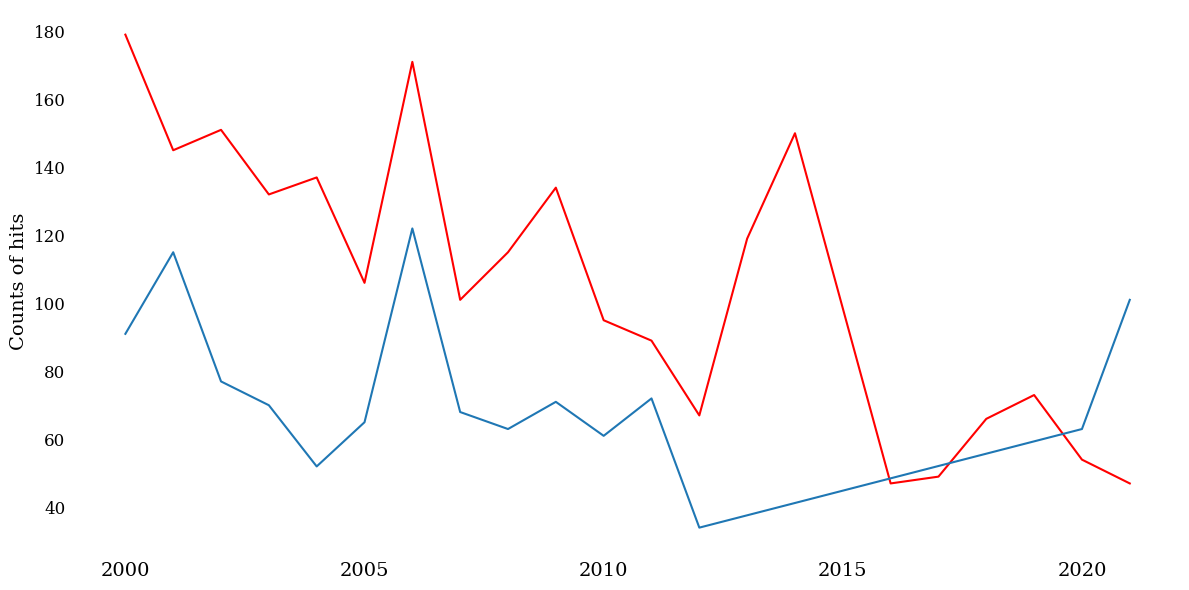

In [61]:
# Produce a graph visualizing these data over time.

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))

sns.lineplot(y='hits', x=df_hits.T.index, data=df_hits.T, color = 'red')
sns.lineplot(y='hits', x=df_hits_BH.T.index, data=df_hits_BH.T)

ax.set_facecolor('white') #set background as white

#remove spines around the chart
ax.spines['top'].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.xlabel('') #year is obvious, we don't need the label
plt.xticks(fontsize=14, family='serif') #set font and size of year on x-axis

plt.ylabel('Counts of hits', fontsize=14, family='serif') #set y-label
plt.yticks(fontsize=12, family='serif') #set font and size of year on x-axis

#control ticks
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    labelbottom=True) # labels along the bottom edge are on

plt.tight_layout() #make sure the layout is efficient